# SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

In [2]:
import SDE_plot_1
from SDE_plot_1 import *

## Example 1

SDE with initial condition being a fixed constant $X_0$:
$$
dX_t = \sigma dW_t, \quad X(0)=X_0.
$$
It can be shown that 
$$
E[X(t)] = X_0, \quad \text{Var}[X(t)] = \sigma^2 t.
$$

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim \mathcal{N}(0, 1).
$$

In [3]:
X_0 = 0

sigma = 1.0

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M
time = np.linspace(0, T, M+1)

In [4]:
# Euler-Maruyama method:
Xh_0 = np.zeros((N, M+1))+X_0
for ii in range(M):
    Xh_0[:, ii+1] = Xh_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)

In [5]:
theo_mean=0.0
theo_std=sigma*np.sqrt(T)

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.024150291688729814
std =  1.4609105275549135

Theoretical results
Theoretical meam =  0.0
Theoretical std =  1.4142135623730951



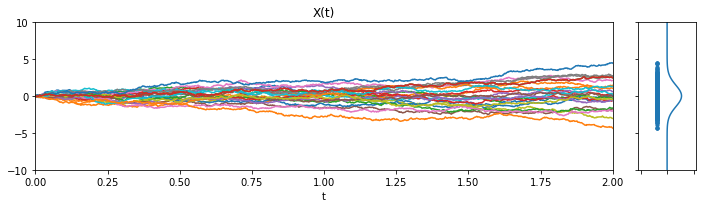

In [6]:
SDE_plot_1(N, M, T, theo_mean, theo_std, time, Xh_0)

## Example 2

SDE with initial condition being a fixed constant $X_0$:
$$
dX_t = \mu dt + \sigma dW_t, \quad X(0)=X_0.
$$
It can be shown that 
$$
E[X(t)] = X_0+\mu t, \quad \text{Var}[X(t)] = \sigma^2 t.
$$

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) + \mu \Delta t + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim \mathcal{N}(0, 1).
$$

In [7]:
X_0 = 0

mu = 3
sigma = 0.5

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M
time = np.linspace(0, T, M+1)

In [8]:
# Euler-Maruyama method:
Xh_0 = np.zeros((N, M+1)) + X_0
for ii in range(M):
    Xh_0[:, ii+1] = Xh_0[:, ii] + mu*dt + sigma*np.sqrt(dt)*np.random.randn(N)

In [9]:
theo_mean=mu*T
theo_std=sigma*np.sqrt(T)

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  5.97100571880069
std =  0.7048172984471827

Theoretical results
Theoretical meam =  6
Theoretical std =  0.7071067811865476



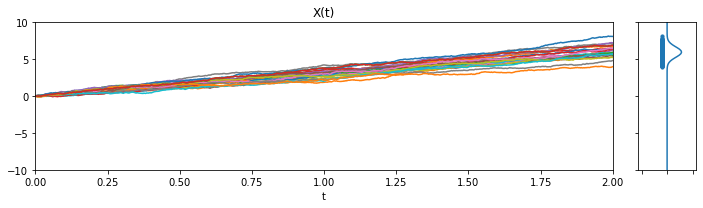

In [10]:
SDE_plot_1(N, M, T, theo_mean, theo_std, time, Xh_0)

## Example 3: Ornstein-Uhenbeck process

Ornstein-Uhenbeck process: $X_0$ is a given constant. 
$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$
It can be shown that
$$
E[X(t)] = e^{-\beta t}X_0, \quad \text{Var}[X(t)] = \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim \mathcal{N}(0, 1).
$$

In [11]:
X_0 = 5

beta = 3
sigma = 2

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M
time = np.linspace(0, T, M+1)

In [12]:
# Euler-Maruyama method:
Xh_0 = np.zeros((N, M+1)) + X_0
for ii in range(M):
    Xh_0[:, ii+1] = Xh_0[:, ii] - beta*dt*Xh_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)  

In [13]:
theo_mean=0
theo_std=np.sqrt((sigma**2)*(1-np.exp(-2.0*beta*T))/(2.0*beta))

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  -0.0032559731529942706
std =  0.8318819998937894

Theoretical results
Theoretical meam =  0
Theoretical std =  0.8164940725596835



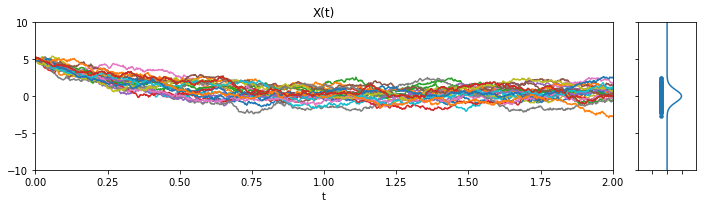

In [14]:
SDE_plot_1(N, M, T, theo_mean, theo_std, time, Xh_0)

## Example 4: Ornstein-Uhenbeck process

Ornstein-Uhenbeck process:
$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$
If $X_0\sim \mathcal{N}(\mu_0, \sigma^2_0)$, then
$$
E[X(t)] = e^{-\beta t}\mu_0, \quad \text{Var}[X(t)] = e^{-2\beta t}\sigma_0^2 + \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim \mathcal{N}(0, 1).
$$

In [15]:
beta = 2.0
sigma = 1.0

mu_0 = 5
sigma_0 = 0.3

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M
time = np.linspace(0, T, M+1)

In [16]:
# Euler-Maruyama method:
Xh_0 = np.zeros((N, M+1))
Xh_0[:,0] = sigma_0*np.random.randn(N) + mu_0
for ii in range(M):
    Xh_0[:, ii+1] = Xh_0[:, ii] - beta*dt*Xh_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)

In [17]:
theo_mean=np.exp(-beta*T)*mu_0
theo_std=np.sqrt(np.exp(-2.0*beta*T)*(sigma_0**2)+(sigma**2)*(1-np.exp(-2.0*beta*T))/(2.0*beta))

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.0973250500737639
std =  0.4845559927100783

Theoretical results
Theoretical meam =  0.0915781944436709
Theoretical std =  0.4999463230983258



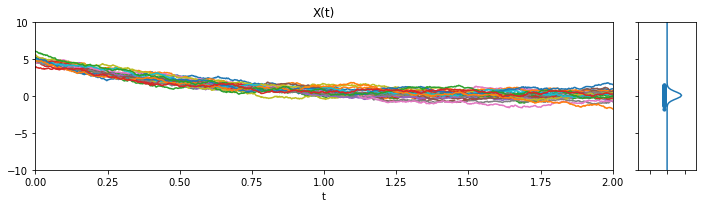

In [18]:
SDE_plot_1(N, M, T, theo_mean, theo_std, time, Xh_0)